In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
sns.set()

In [ ]:
os.chdir('/content/drive/MyDrive')

In [ ]:
dataset = pd.read_csv('KNN_Project_Data')

In [20]:
dataset.head()

XVPM         GWYH  ...         JHZC  TARGET CLASS
0  1636.670614   817.988525  ...   845.136088             0
1  1013.402760   577.587332  ...   861.081809             1
2  1300.035501   820.518697  ...  1647.186291             1
3  1059.347542  1066.866418  ...  1450.935357             0
4  1018.340526  1313.679056  ...  1899.850792             0

[5 rows x 11 columns]

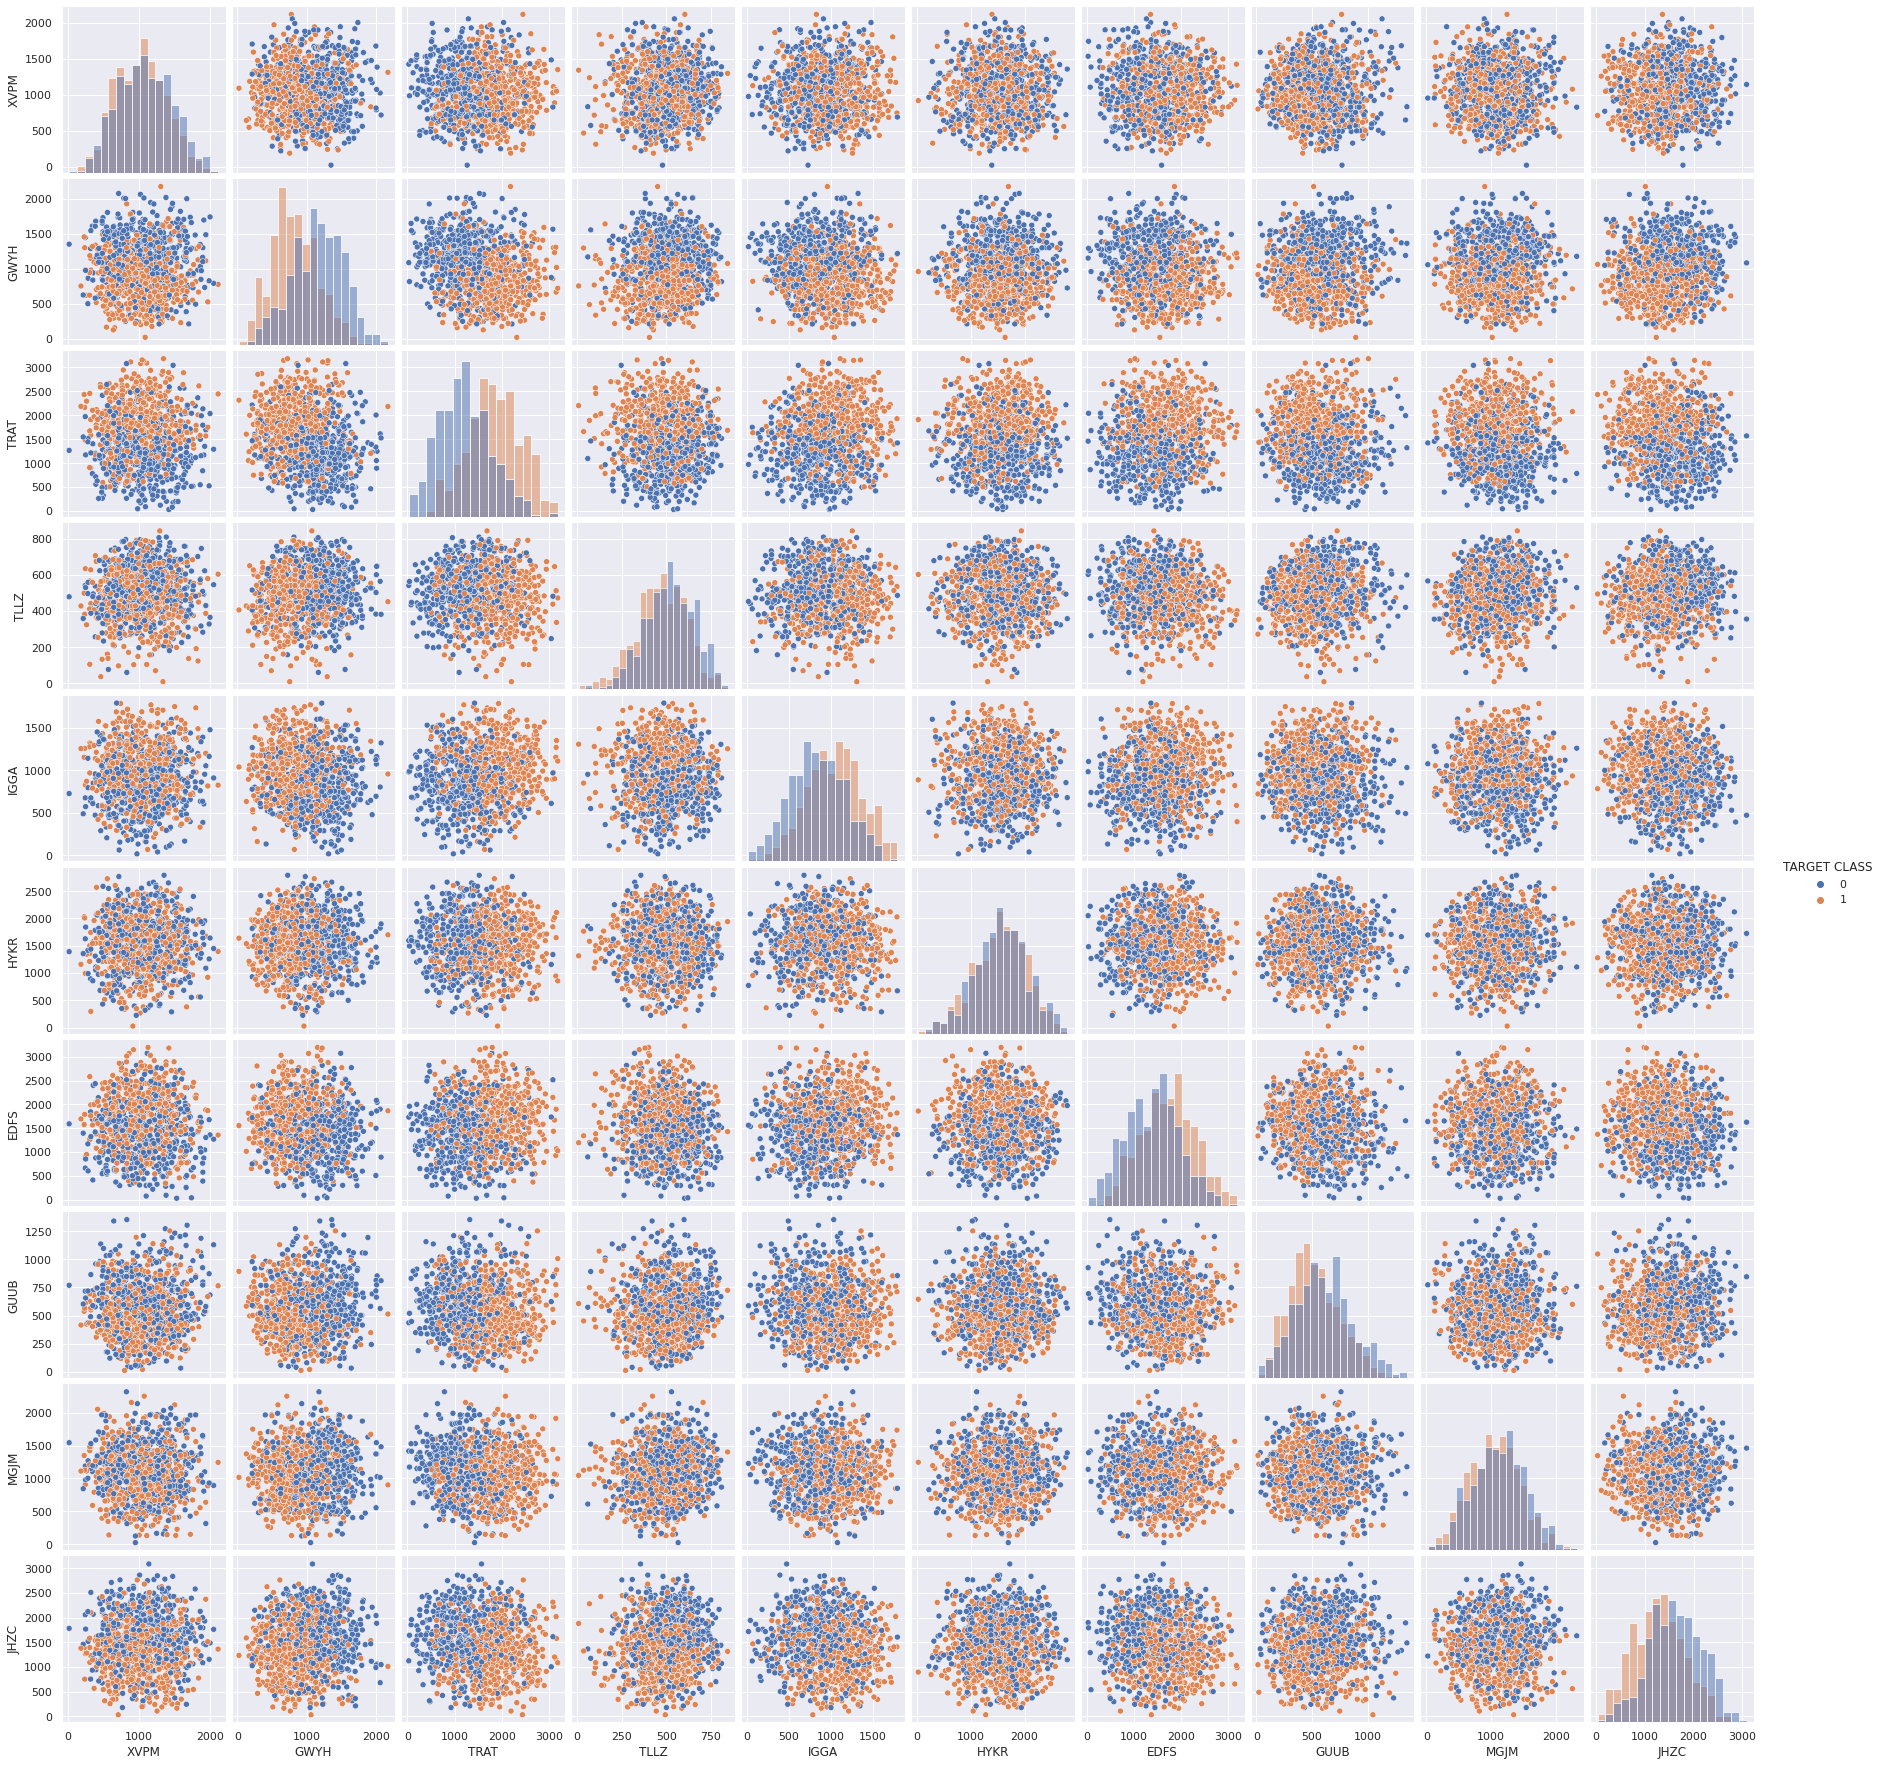

In [21]:
sns.pairplot(data = dataset, hue = 'TARGET CLASS', diag_kind = 'hist' )

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(dataset.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(dataset.drop('TARGET CLASS',axis=1))

In [12]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, dataset['TARGET CLASS'], test_size = 0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
y_pred = knn.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(confusion_matrix(y_test, y_pred))

[[104  44]
 [ 39 113]]


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       148
           1       0.72      0.74      0.73       152

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [28]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

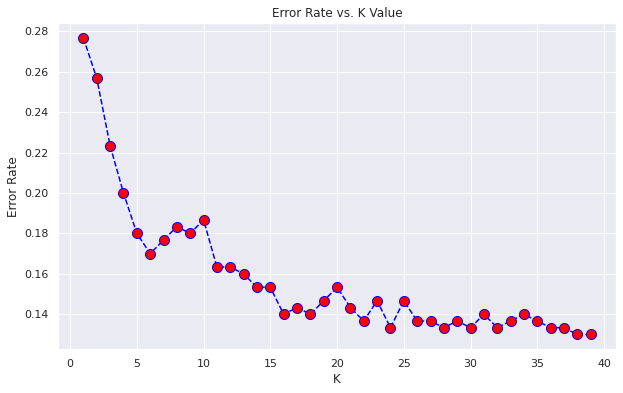

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[125  23]
 [ 17 135]]


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       148
           1       0.85      0.89      0.87       152

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

